# S&P 500 Analysis

## Import the Packages, Functions and Data

In [1]:
import pandas as pd
from EDA_functions import EDA, normality_check,stationarity_check,decomposition_plot,daily_returns
from Baseline_functions import capital_calculation, calculate_macd_signals, profit_trades, loss_trades
from DQN_functions import create_states, ReplayMemory, DQNAgent,train_agent,evaluate_agent, ConvDQN,plot_training,create_action_episode_df, plot_dual_axis,train_agent_hold
import pandas as pd
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('data/SP500.pkl')

## EDA

### Visual

In [3]:
EDA(df)

alt.VConcatChart(...)

In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  5033.000000  5033.000000  5033.000000  5033.000000  5033.000000   
mean   2185.198566  2197.475040  2172.173739  2185.667115  2185.667115   
std    1123.523677  1129.279964  1117.572283  1123.864771  1123.864771   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%    1277.829956  1284.880005  1269.189941  1277.930054  1277.930054   
50%    1860.089966  1873.250000  1849.229980  1862.310059  1862.310059   
75%    2840.290039  2853.290039  2822.449951  2840.600098  2840.600098   
max    5253.430176  5264.850098  5245.819824  5254.350098  5254.350098   

             Volume  daily_return  cumulative_return  
count  5.033000e+03   5033.000000        5033.000000  
mean   3.768926e+09      0.000379           1.940728  
std    1.283836e+09      0.012040           0.997918  
min    5.045800e+08     -0.119841           0.600714  
25%    3.084260e+09     -0.004101           1.134717  
50%    3.689410e+09      0.000700           1.653608  
75%    4.336410e+09      0.005686           2.522265  
max    1.145623e+10      0.115800           4.665516

### Without Differencing

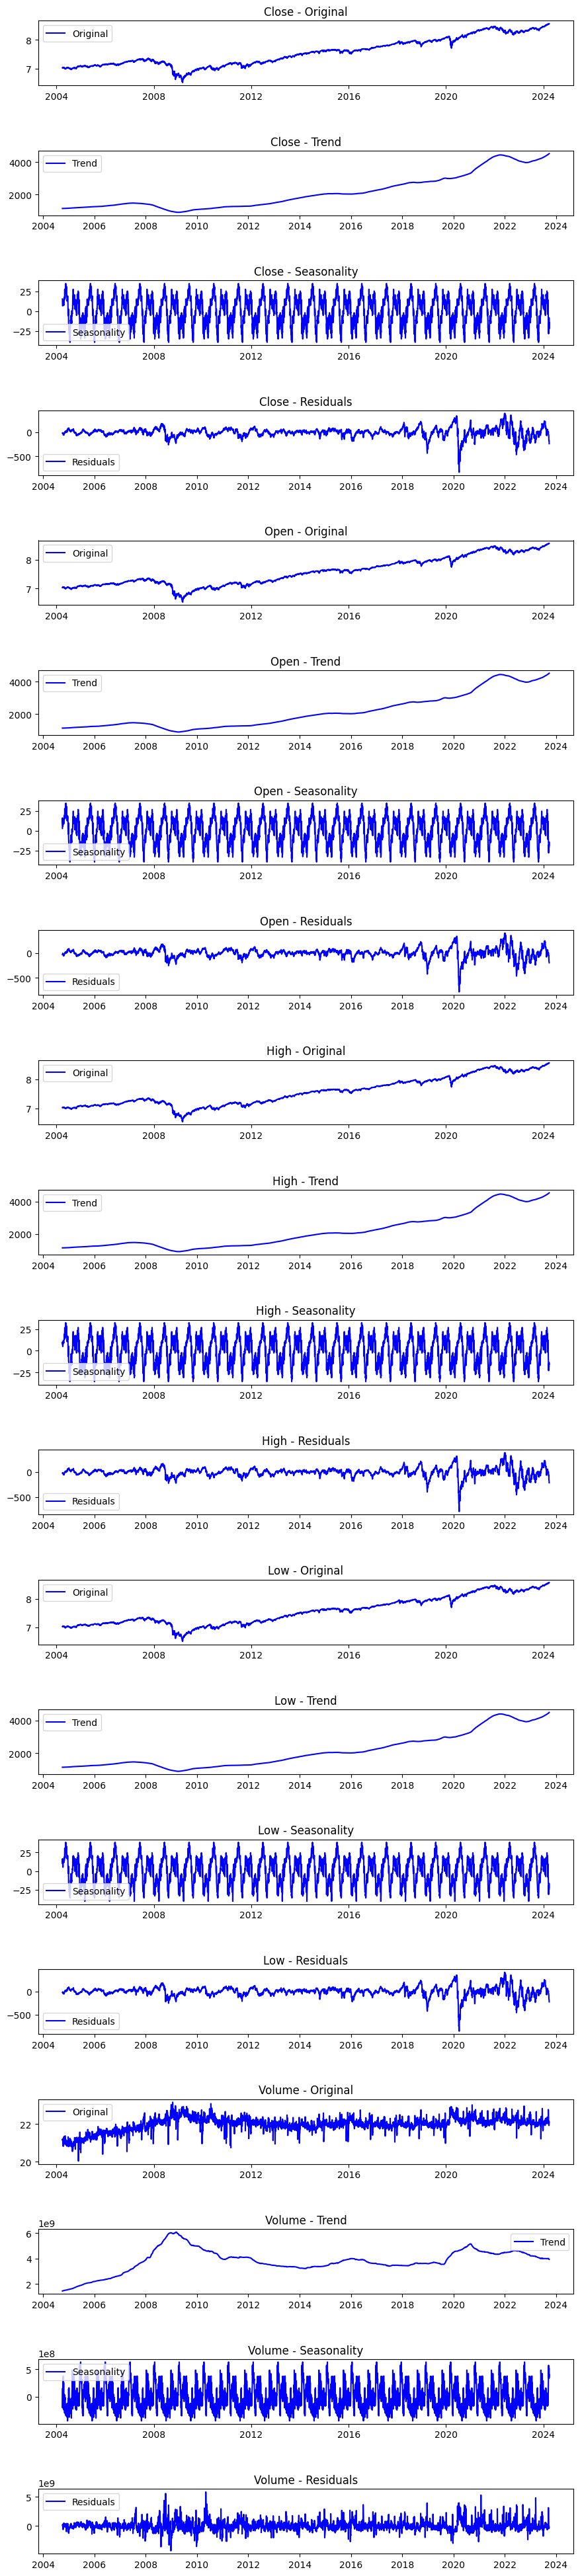

In [5]:
decomposition_plot(df,0)


Results of Dickey-Fuller Test for Close: 

Test Statistic                    1.628254
p-value                           0.997940
#Lags Used                       30.000000
Number of Observations Used    5002.000000
Critical Value (1%)              -3.431658
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                    1.700596
p-value                           0.998130
#Lags Used                       31.000000
Number of Observations Used    5001.000000
Critical Value (1%)              -3.431658
Critical Value (5%)              -2.862118
Critical Value (10%)             -2.567078
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                    1.743458
p-value                           0.998230
#Lags Used                       31.000000
Number of Observations Used    5001.000000
Critical Value (1%)              -3.431658
Critical Value (5%)    

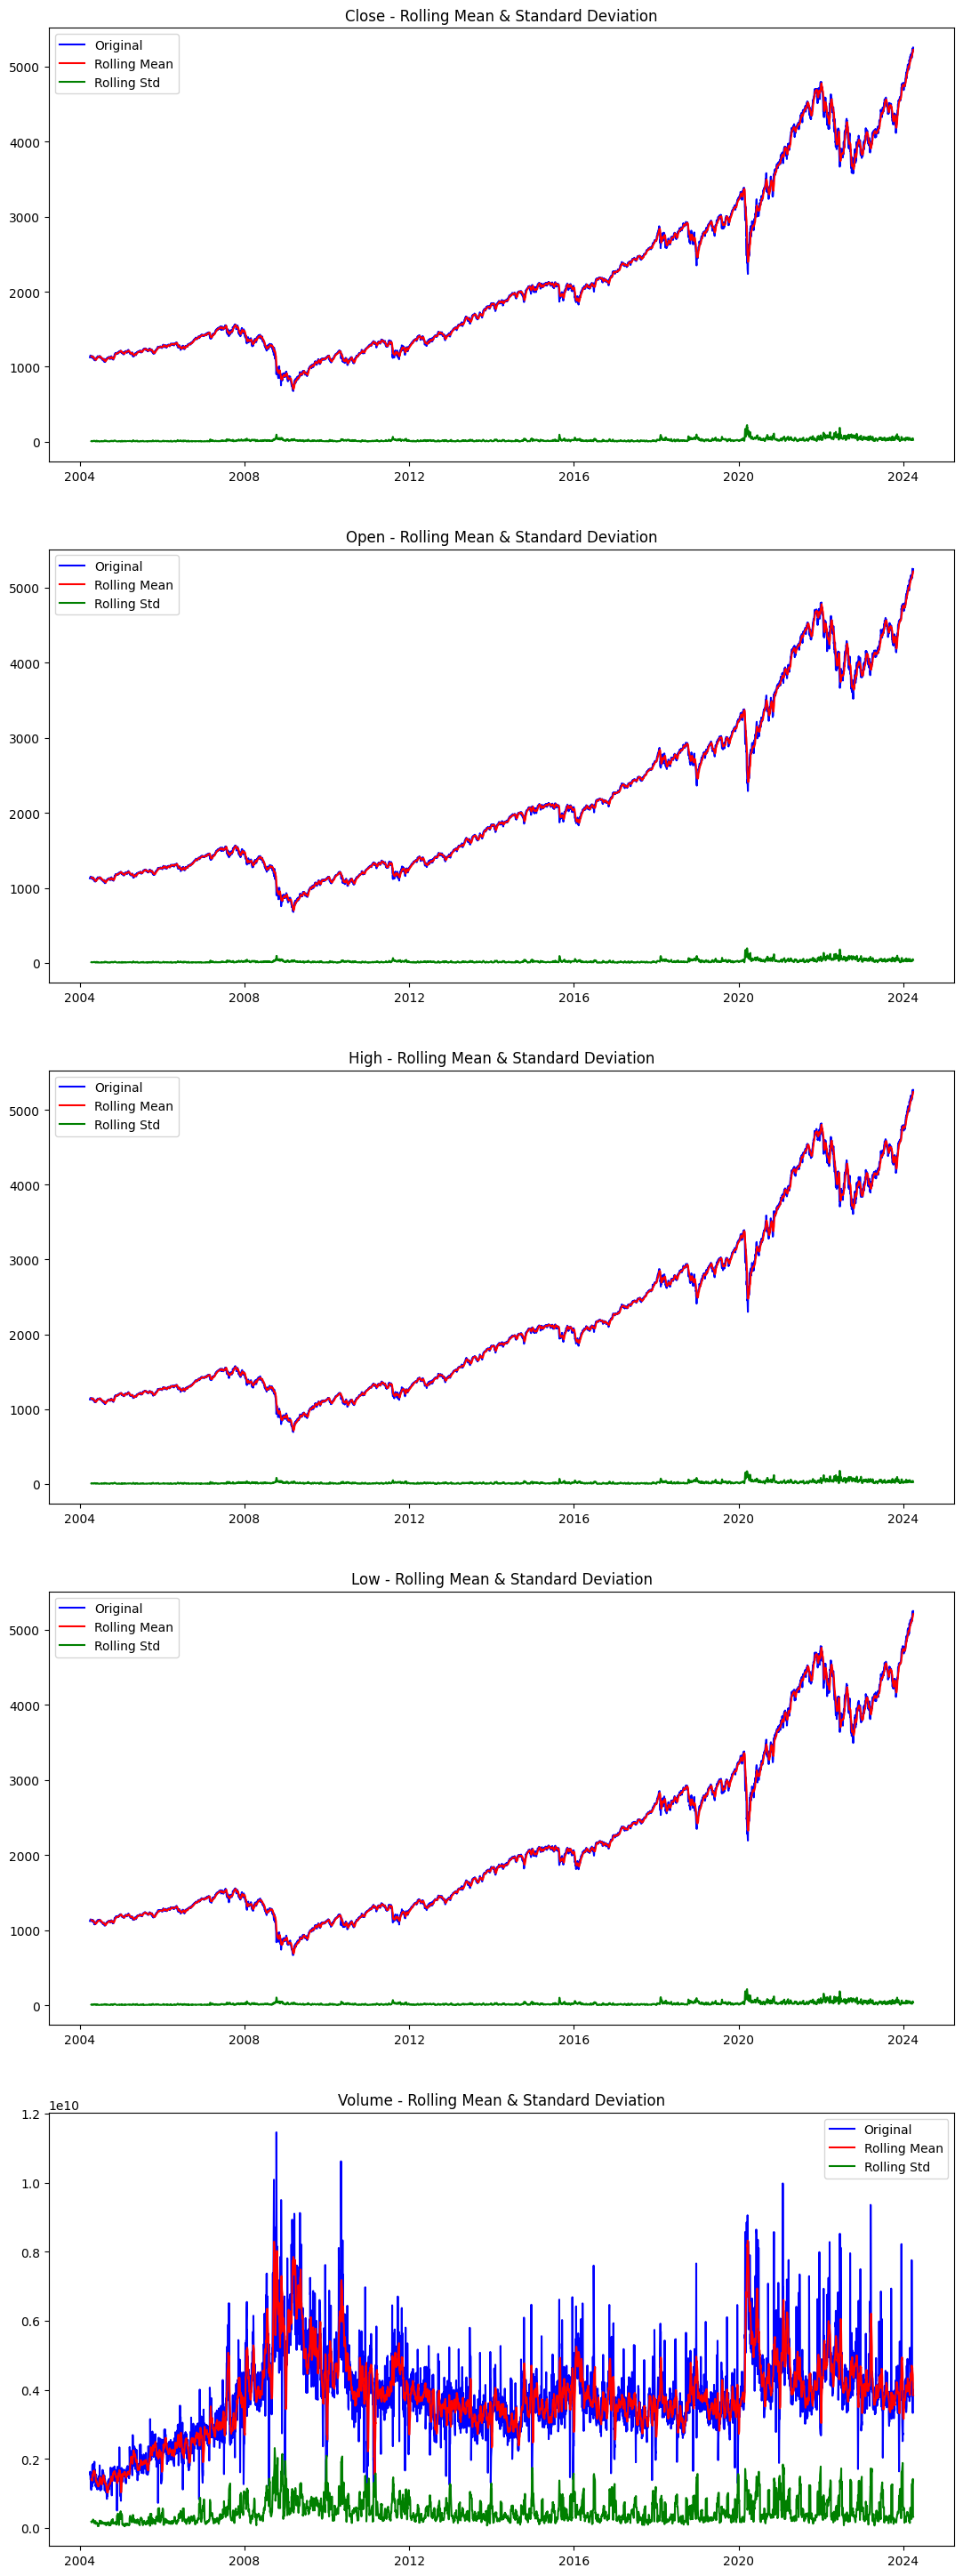

In [6]:
stationarity_check(df,0)

In [7]:
normality_check(df,0)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 711.3992761097022, p-value: 3.32360939389368e-155
Normal Test ---- statistic: 556.7531377464697, p-value: 1.2664622444057867e-121

Normality Check for Open:
Jarque-Bera Test ---- statistic: 710.8308022320434, p-value: 4.416238422215978e-155
Normal Test ---- statistic: 556.807664264308, p-value: 1.2324007793517596e-121

Normality Check for High:
Jarque-Bera Test ---- statistic: 714.1867129609684, p-value: 8.247565175848687e-156
Normal Test ---- statistic: 559.55516396984, p-value: 3.119895040385865e-122

Normality Check for Low:
Jarque-Bera Test ---- statistic: 708.2843836705745, p-value: 1.5776122752422415e-154
Normal Test ---- statistic: 554.0471408197556, p-value: 4.899954122912047e-121

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 1537.629213928849, p-value: 0.0
Normal Test ---- statistic: 685.0945309608994, p-value: 1.7124299336548348e-149


### After 1st Difference

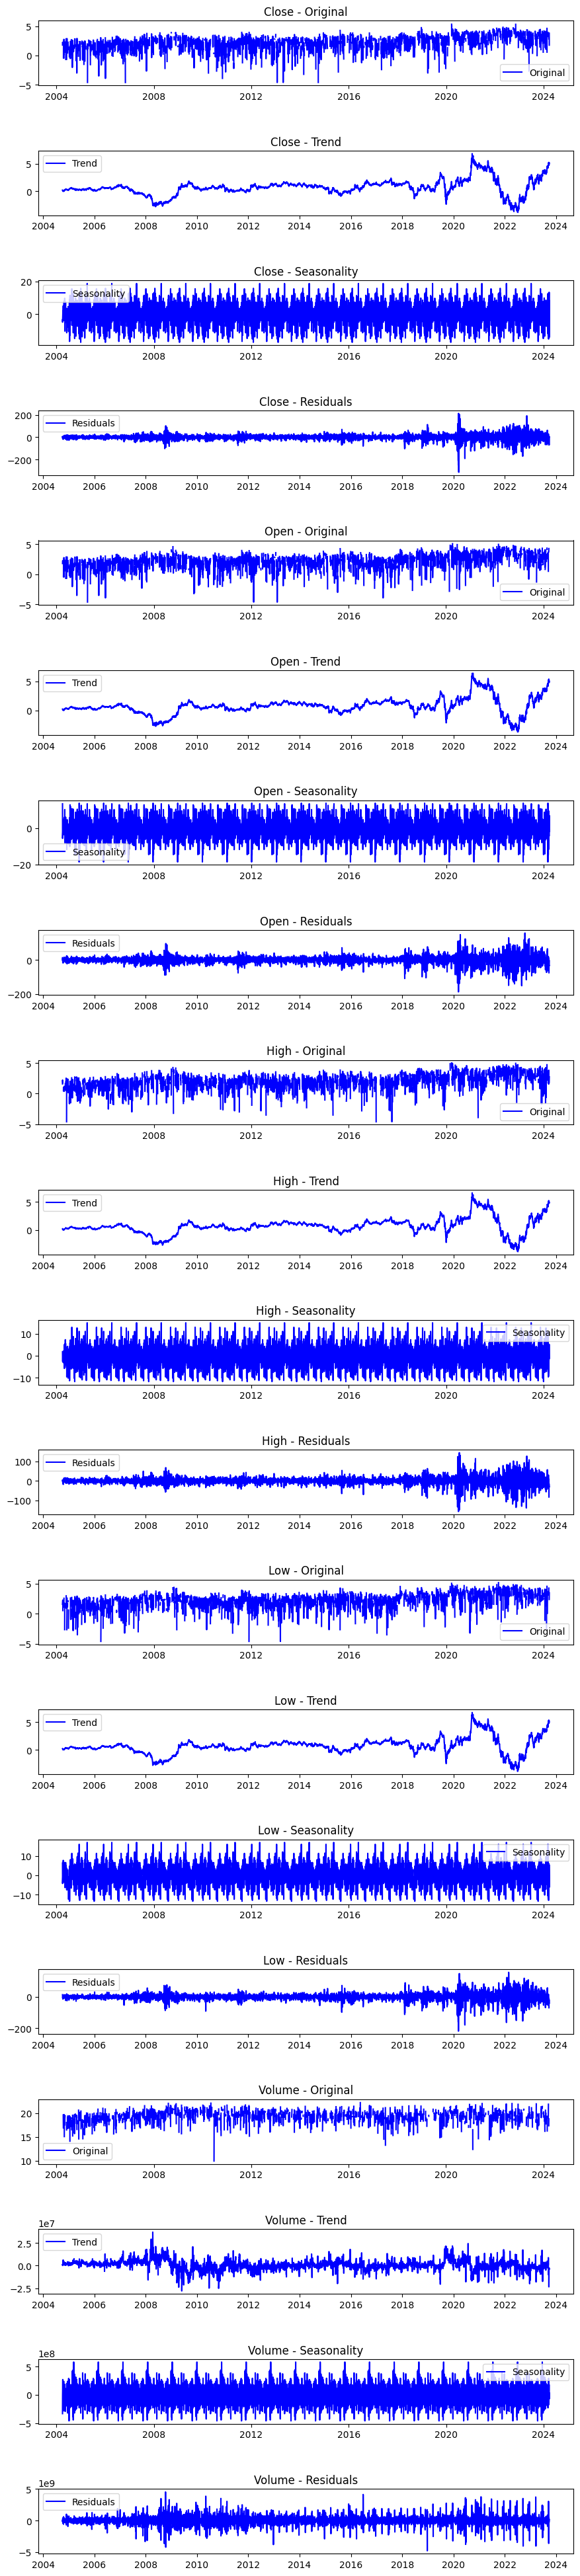

In [8]:
decomposition_plot(df,1)


Results of Dickey-Fuller Test for Close: 

Test Statistic                -1.399685e+01
p-value                        3.925663e-26
#Lags Used                     2.900000e+01
Number of Observations Used    5.002000e+03
Critical Value (1%)           -3.431658e+00
Critical Value (5%)           -2.862118e+00
Critical Value (10%)          -2.567078e+00
dtype: float64

Results of Dickey-Fuller Test for Open: 

Test Statistic                -1.415539e+01
p-value                        2.126080e-26
#Lags Used                     3.000000e+01
Number of Observations Used    5.001000e+03
Critical Value (1%)           -3.431658e+00
Critical Value (5%)           -2.862118e+00
Critical Value (10%)          -2.567078e+00
dtype: float64

Results of Dickey-Fuller Test for High: 

Test Statistic                -1.310659e+01
p-value                        1.667659e-24
#Lags Used                     3.200000e+01
Number of Observations Used    4.999000e+03
Critical Value (1%)           -3.431659e+00
Crit

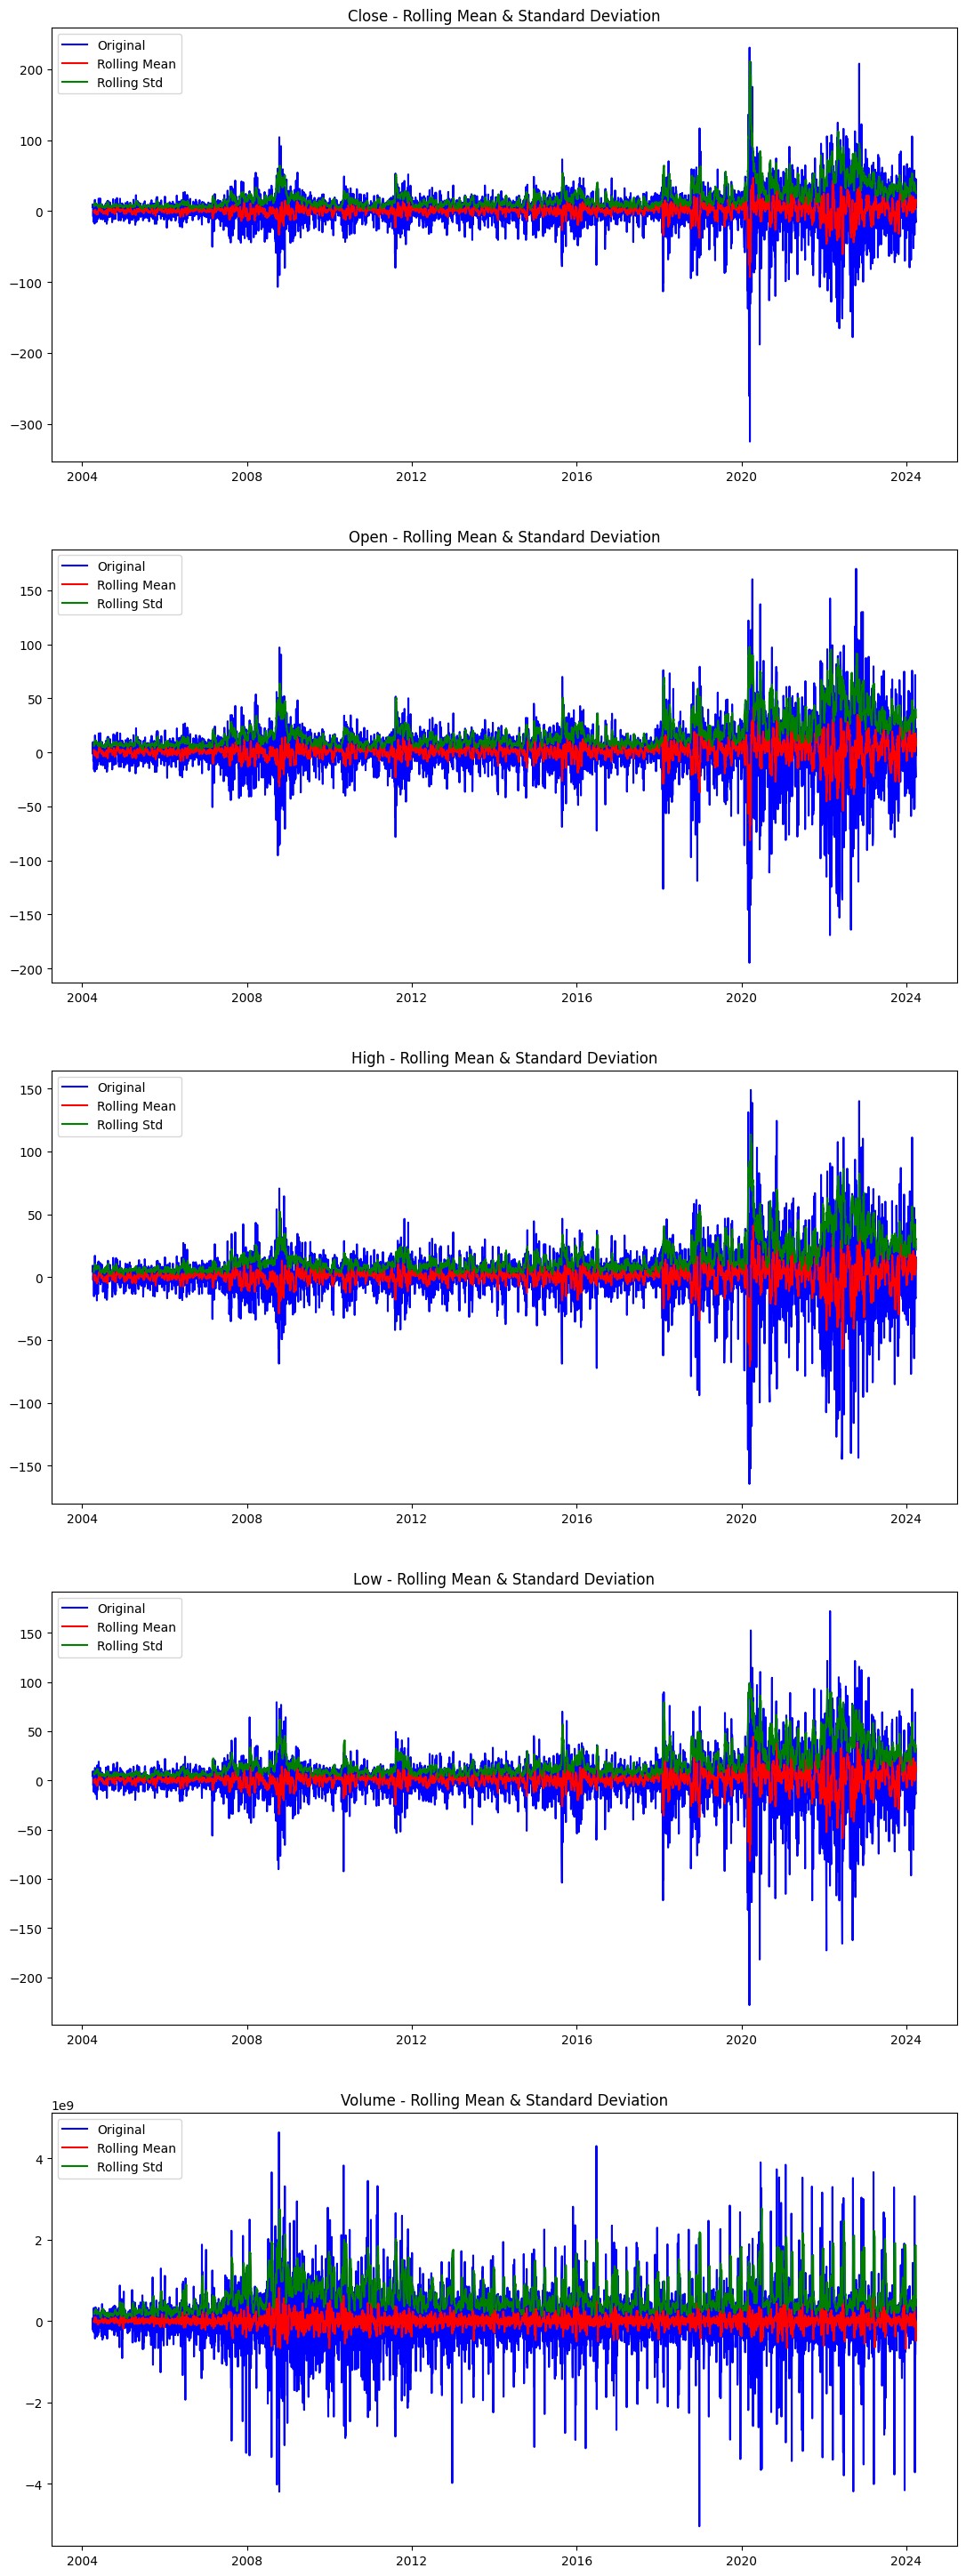

In [9]:
stationarity_check(df,1)

In [10]:
normality_check(df,1)


Normality Check for Close:
Jarque-Bera Test ---- statistic: 46230.67914599442, p-value: 0.0
Normal Test ---- statistic: 1441.9495106890124, p-value: 0.0

Normality Check for Open:
Jarque-Bera Test ---- statistic: 13709.240671571755, p-value: 0.0
Normal Test ---- statistic: 996.535578512407, p-value: 4.027621178969155e-217

Normality Check for High:
Jarque-Bera Test ---- statistic: 21734.49261231433, p-value: 0.0
Normal Test ---- statistic: 1148.8019759718716, p-value: 3.473925638980577e-250

Normality Check for Low:
Jarque-Bera Test ---- statistic: 19334.82060785199, p-value: 0.0
Normal Test ---- statistic: 1204.3591676097817, p-value: 2.9972960319497127e-262

Normality Check for Volume:
Jarque-Bera Test ---- statistic: 10578.976889756594, p-value: 0.0
Normal Test ---- statistic: 731.5061198220593, p-value: 1.4304225283859206e-159


### Outlier Check

Since price gradually increases, it does not make sense to use traditional outlier checking methods. Therefore we calculate the daily change and then the outliers in those

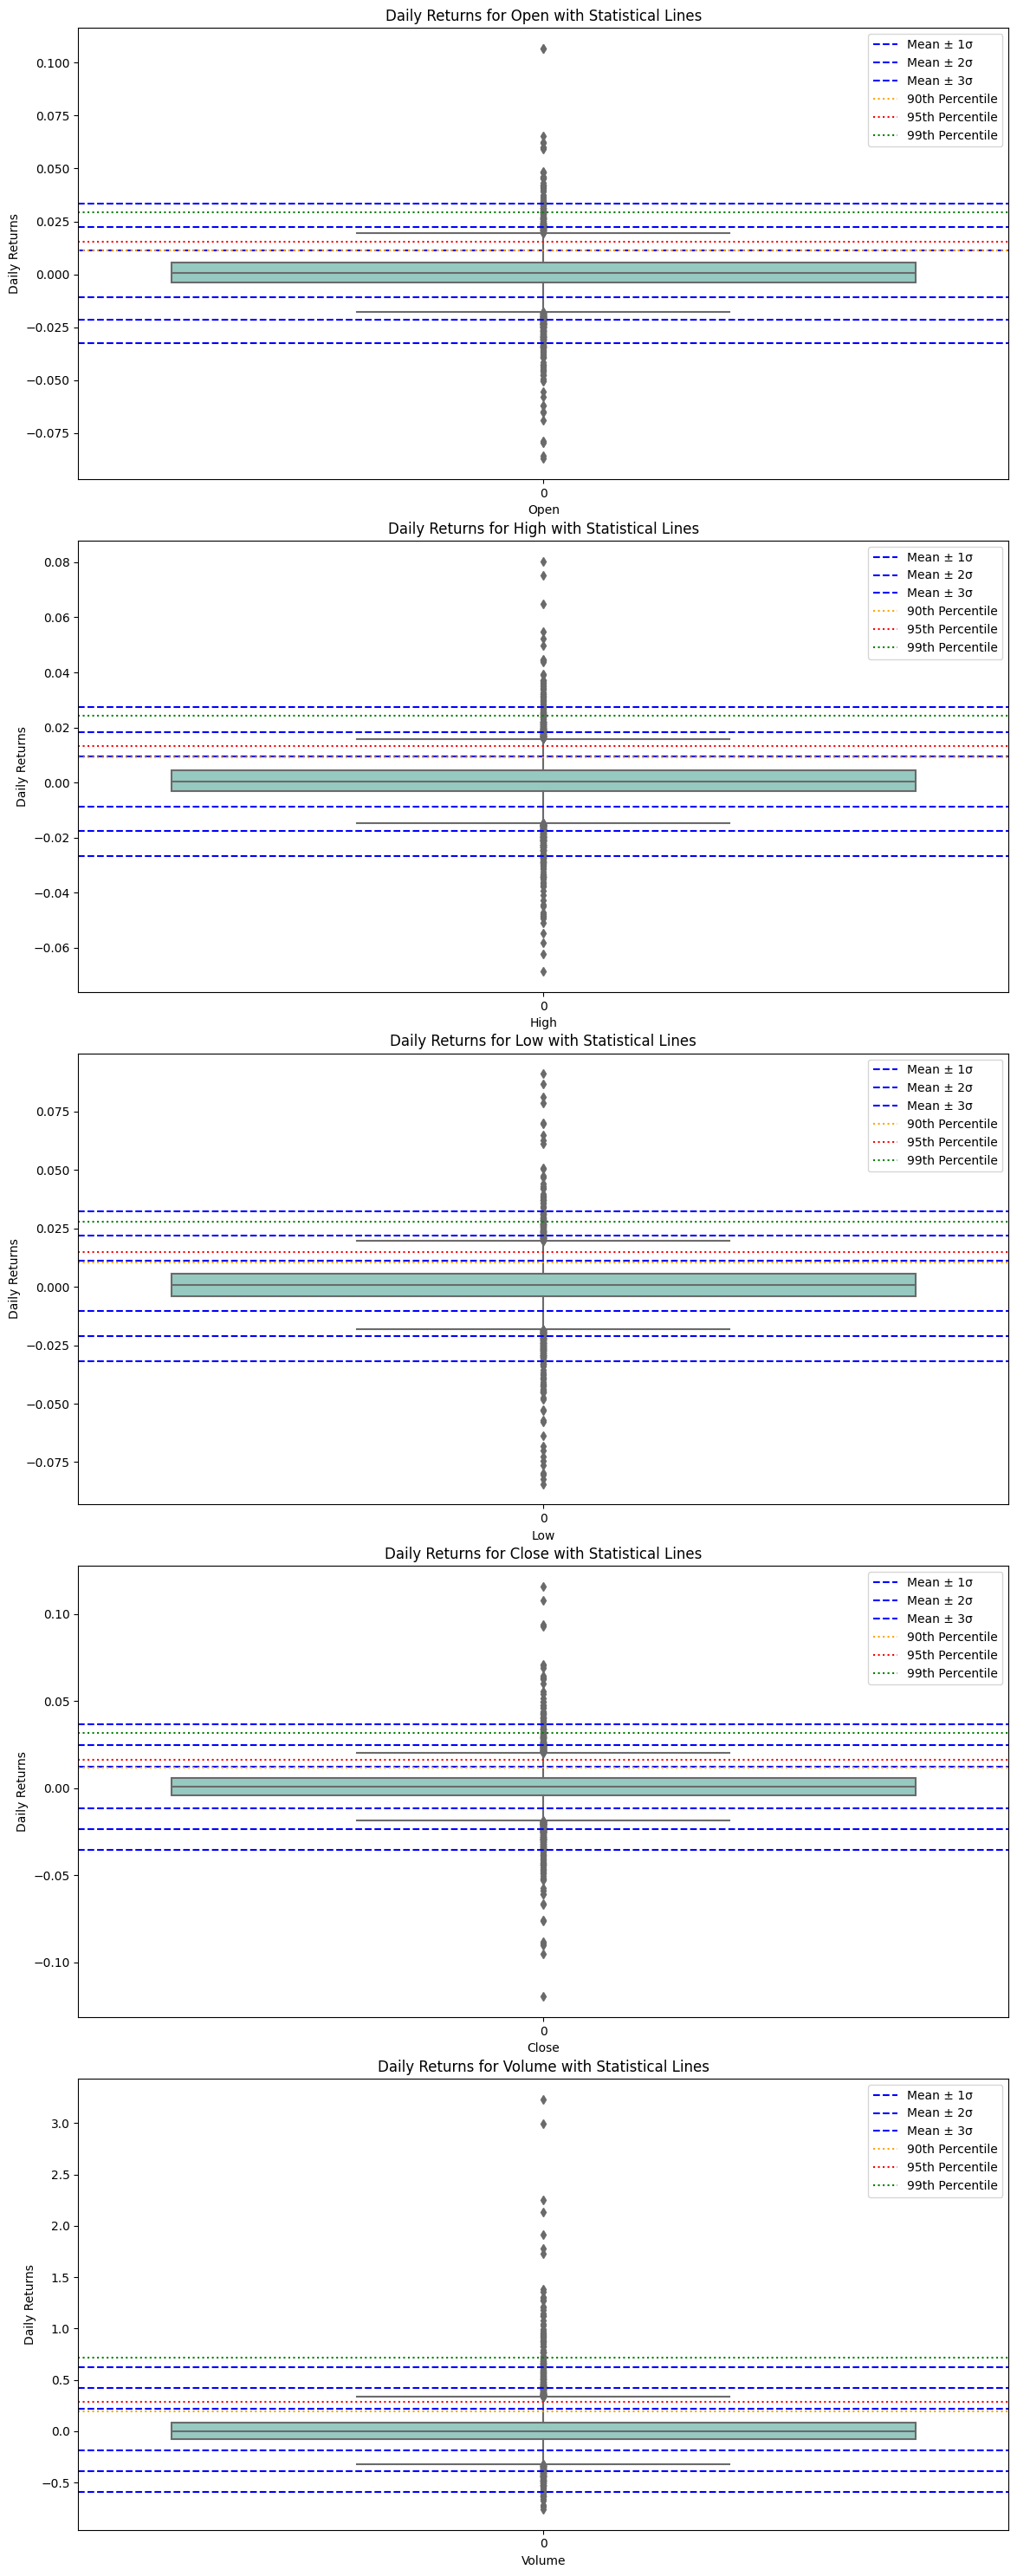

In [11]:
daily_returns(df)

## Outlier Removal 


In [3]:
df['daily_return'] = df['Close'].pct_change()
df['daily_return'] = df['daily_return'].fillna(0)
#mean plus 3sigma value for absolute daily returns
mean = df['daily_return'].mean()
std = df['daily_return'].std()
upper_limit = mean + 2*std
lower_limit = mean - 2*std
print(f'Mean: {mean}, Std: {std}, Upper Limit: {upper_limit}, Lower Limit: {lower_limit}')
#number of rows that are outside the 3 sigma range
print(f'Number of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])}')
print(f'Percentage of rows outside 2 sigma range: {len(df[(df["daily_return"]>upper_limit) | (df["daily_return"]<lower_limit)])/len(df)*100}% ')

#if daily return is outside 3 sigma range, replace all the values with previous day's values
for i in range(1,len(df)):
    if df['daily_return'][i]>upper_limit or df['daily_return'][i]<lower_limit:
        df['Close'][i] = df['Close'][i-1]
        df['Open'][i] = df['Open'][i-1]
        df['High'][i] = df['High'][i-1]
        df['Low'][i] = df['Low'][i-1]
        df['Volume'][i] = df['Volume'][i-1]
        df['daily_return'][i] = 'NaN'

Mean: 0.00037873998112499885, Std: 0.012040180200659603, Upper Limit: 0.024459100382444206, Lower Limit: -0.023701620420194205
Number of rows outside 2 sigma range: 244
Percentage of rows outside 2 sigma range: 4.848003179018478% 


## Baseline Models


In [13]:
df_base = calculate_macd_signals(df)

Total Pofit: 62.18968105105512
Final Capital: 162.18968105105512
Overall Return: 62.18968105105512
Overall Return %: 62.18968105105511
Number of Days: 5032
Number of Trades: 801
Ratio of Trades to Days:  0.159181240063593


In [14]:
df_base = profit_trades(df_base)

Total Pofit: 9937015.563252293
Final Capital: 9937115.563252293
Overall Return: 9937015.563252293
Overall Return %: 9937015.563252293
Number of Days: 5032
Number of Trades: 728
Ratio of Trades to Days:  0.14467408585055644


In [15]:
df_base = loss_trades(df_base)

Total Pofit: -99.99578740182152
Final Capital: 0.00421259817847989
Overall Return: -99.99578740182152
Overall Return %: -99.99578740182152
Number of Days: 5032
Number of Trades: 713
Ratio of Trades to Days:  0.1416931637519873


## DQN

### Training

In [4]:
df_base = df[['Open','High','Low','Close','Volume']]
#include 26 and 12 ema
df_base['26ema'] = df_base['Close'].ewm(span=26).mean()
df_base['12ema'] = df_base['Close'].ewm(span=12).mean()
#fill na as 0
df_base = df_base.dropna()
df_base = df_base[['Open','High','Low','Close','Volume','26ema','12ema']]

#first 80% of the data is train
df_train = df_base.iloc[:int(len(df_base)*0.8)]
#last 20% of the data is test
df_test = df_base.iloc[int(len(df_base)*0.8):]

In [5]:
display(df_train.head())

display(df_test.head())

Open         High  ...        26ema        12ema
Date                                  ...                          
2004-03-31  1127.000000  1130.829956  ...  1126.209961  1126.209961
2004-04-01  1126.209961  1135.670044  ...  1129.304619  1129.438339
2004-04-02  1132.170044  1144.810059  ...  1133.797702  1134.267024
2004-04-05  1141.810059  1150.569946  ...  1138.486489  1139.413220
2004-04-06  1150.569946  1150.569946  ...  1140.729824  1141.789698

[5 rows x 7 columns]

Open         High  ...        26ema        12ema
Date                                  ...                          
2020-03-30  2457.770020  2571.419922  ...  2788.802479  2596.828742
2020-03-31  2614.689941  2641.389893  ...  2773.675635  2594.945872
2020-04-01  2614.689941  2641.389893  ...  2759.669298  2593.352674
2020-04-02  2458.540039  2533.219971  ...  2742.427121  2583.129171
2020-04-03  2514.919922  2538.179932  ...  2723.628808  2568.593899

[5 rows x 7 columns]

In [6]:
print(df_train.shape, df_test.shape)
print(df_train.shape[0] + df_test.shape[0])
print(df.shape[0])

(4026, 7) (1007, 7)
5033
5033


In [7]:
window_size = 26
states = create_states(df_train, window_size)
test_states = create_states(df_test, window_size)
input_dim_conv = states.shape[2]
output_dim = 3
print("Shape of states:", states.shape)

Shape of states: (4000, 26, 7)


In [8]:
model = ConvDQN(input_dim_conv, output_dim, window_size)
memory = ReplayMemory(50000)
agent = DQNAgent(input_dim_conv, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.9995)

Episode 1/800, Total Reward: -506.6822021484375, Loss: 26.543333031910876
Episode 2/800, Total Reward: 0.0, Loss: 24.373089628989387
Episode 3/800, Total Reward: -101.89319884232442, Loss: 22.95257009426118
Episode 4/800, Total Reward: 66.170166015625, Loss: 20.77117869449014
Episode 5/800, Total Reward: 9.645731997802738, Loss: 19.958870443528077
Episode 6/800, Total Reward: -562.980224609375, Loss: 20.280824131292896
Episode 7/800, Total Reward: -496.81005859375, Loss: 18.283528724762753
Episode 8/800, Total Reward: -222.67909859985355, Loss: 16.273893972677886
Episode 9/800, Total Reward: -6.954376625605836, Loss: 13.38486945873841
Episode 10/800, Total Reward: -26.912221320160622, Loss: 12.892200875789678
Episode 11/800, Total Reward: -20.0, Loss: 10.474643416557258
Episode 12/800, Total Reward: 11.90831110839844, Loss: 6.173934675323152
Episode 13/800, Total Reward: -1.1788188565498603, Loss: 6.206760307269421
Episode 14/800, Total Reward: -3.044196051662474e-08, Loss: 6.611920844

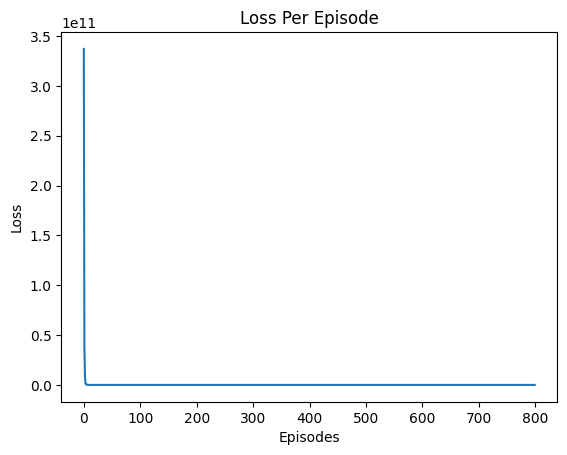

CPU times: user 1d 3h 33min 11s, sys: 7h 4min 34s, total: 1d 10h 37min 46s
Wall time: 8h 19min 44s


In [9]:
%%time
log_train = train_agent(agent, states, 800, batch_size=32)

In [16]:
log_train.to_csv('SP500/log_train_CNN_updated_reward_MA_800ep.csv', index=False)

In [17]:
#save the model
torch.save(agent.model.state_dict(), 'SP500/DQN_CNN_updated_reward_MA_800ep.pth')


Training without Hold penalty
Episode 1/800, Total Reward: 0.0, Loss: 28.27862652210985
Episode 2/800, Total Reward: -562.980224609375, Loss: 24.759222399580096
Episode 3/800, Total Reward: -562.980224609375, Loss: 25.360445111024724
Episode 4/800, Total Reward: 0.0, Loss: 22.529079637090362
Episode 5/800, Total Reward: -562.980224609375, Loss: 21.207650600186767
Episode 6/800, Total Reward: 0.0, Loss: 18.160308318455897
Episode 7/800, Total Reward: 0.0, Loss: 15.966375614722088
Episode 8/800, Total Reward: -562.980224609375, Loss: 14.374533384418495
Episode 9/800, Total Reward: 0.0, Loss: 9.345550359853883
Episode 10/800, Total Reward: 6.219970703125, Loss: 9.296562415714375
Episode 11/800, Total Reward: -496.81005859375, Loss: 8.945829684496326
Episode 12/800, Total Reward: -144.019775390625, Loss: 7.1643058391329575
Episode 13/800, Total Reward: 5.650146484375, Loss: 6.947611612088953
Episode 14/800, Total Reward: -18.2999267578125, Loss: 6.803172794455448
Episode 15/800, Total Rewa

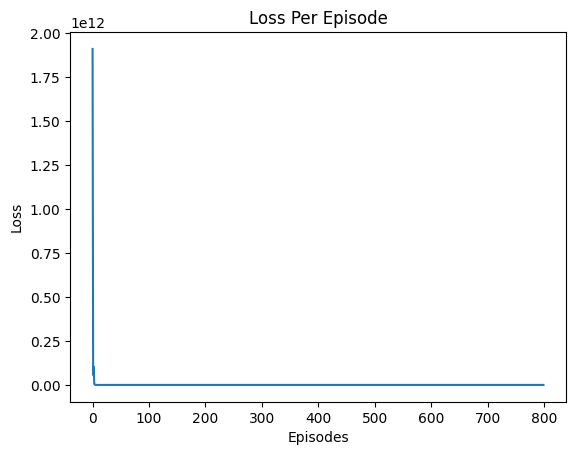

In [9]:
print("Training without Hold penalty")
log_train_no_hold = train_agent_hold(agent, states, 800, batch_size=32)

In [30]:
log_train_no_hold.to_csv('SP500/log_train_CNN_updated_reward_MA_no_hold_800ep.csv', index=False)

#save the model
torch.save(agent.model.state_dict(), 'SP500/DQN_CNN_updated_reward_MA_no_hold_800ep.pth')

### Evaluating and Testing

In [11]:
log_train = pd.read_csv('SP500/log_train_CNN_updated_reward_MA_800ep.csv')

In [12]:
log_train.rename(columns={'Reward':'Training_reward'}, inplace=True)
log_train_no_hold.rename(columns={'Reward':'Training_reward_no_hold'}, inplace=True)

In [13]:
reward =[]
for i in range(1,log_train['Episode'].max()+1):
    last_episode = log_train[log_train['Episode'] == i]
    last_episode.reset_index(drop=True, inplace=True)
    last_episode['Close'] = last_episode['Price'].to_list()
    reward.append(list(capital_calculation(last_episode,'Action'))[-1]-100)

reward_no_hold =[]
for i in range(1,log_train_no_hold['Episode'].max()+1):
    last_episode = log_train_no_hold[log_train_no_hold['Episode'] == i]
    last_episode.reset_index(drop=True, inplace=True)
    last_episode['Close'] = last_episode['Price'].to_list()
    reward_no_hold.append(list(capital_calculation(last_episode,'Action'))[-1]-100)

Total Pofit: 22.444672722356913
Total Pofit: 45.67122841778385
Total Pofit: 64.64904469261117
Total Pofit: 83.09632378392868
Total Pofit: 125.51772171427751
Total Pofit: 2.439007005493366
Total Pofit: 120.9239968783194
Total Pofit: -7.674124296997974
Total Pofit: 114.90874533913922
Total Pofit: 71.63747266445344
Total Pofit: 18.265565440909967
Total Pofit: 85.85153792943765
Total Pofit: -31.439793691035277
Total Pofit: 41.79076078548076
Total Pofit: 22.09856757193168
Total Pofit: 58.46347635906025
Total Pofit: 16.380662712222303
Total Pofit: -12.331589675289763
Total Pofit: 34.31103907143586
Total Pofit: 78.04290282831909
Total Pofit: 16.52990687012141
Total Pofit: 62.162199159571145
Total Pofit: 51.536403925281206
Total Pofit: 16.58405976806118
Total Pofit: 84.35102344544956
Total Pofit: -21.61770137864977
Total Pofit: 37.32238854958757
Total Pofit: 53.977652985503994
Total Pofit: 31.43551357809588
Total Pofit: -11.071810372146558
Total Pofit: 29.045498802283305
Total Pofit: 74.995517

In [14]:
log_train['Reward'] = log_train['Episode'].apply(lambda x: reward[x-1])
log_train_no_hold['Reward'] = log_train_no_hold['Episode'].apply(lambda x: reward_no_hold[x-1])

In [26]:
log_train

Episode  Time  Training_reward Action        Price          Loss  \
0              1     1         0.000000   Hold  1113.989990  3.369947e+11   
1              1     2         0.000000    Buy  1098.699951  3.369947e+11   
2              1     3         0.000000   Hold  1087.119995  3.369947e+11   
3              1     4        -3.250000   Sell  1095.449951  3.369947e+11   
4              1     5        -2.925000   Hold  1097.280029  3.369947e+11   
...          ...   ...              ...    ...          ...           ...   
3199195      800  3995        -9.209961   Hold  2409.389893  4.190174e+02   
3199196      800  3996        -9.209961   Hold  2409.389893  4.190174e+02   
3199197      800  3997        -9.209961   Hold  2409.389893  4.190174e+02   
3199198      800  3998        -9.209961   Hold  2409.389893  4.190174e+02   
3199199      800  3999        -9.209961   Hold  2475.560059  4.190174e+02   

             Reward  
0         22.444673  
1         22.444673  
2         22.444673  
3         22.444673  
4         22.444673  
...             ...  
3199195  116.274337  
3199196  116.274337  
3199197  116.274337  
3199198  116.274337  
3199199  116.274337  

[3199200 rows x 7 columns]

In [16]:
reward_df = pd.DataFrame(reward, columns=['Reward'])
reward_df['Episode'] = reward_df.index+1

reward_no_hold_df = pd.DataFrame(reward_no_hold, columns=['Reward'])
reward_no_hold_df['Episode'] = reward_no_hold_df.index+1

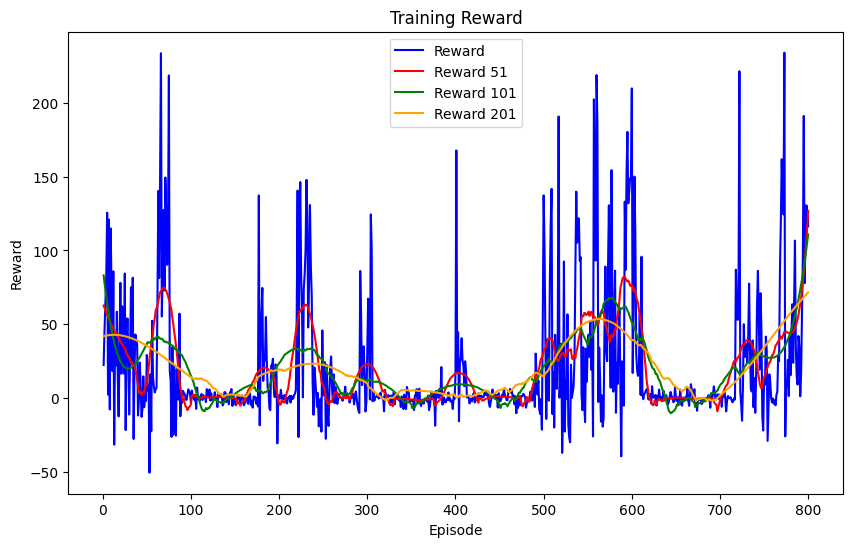

In [17]:
#plot reward and multiple smoothened lines of it
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

plt.figure(figsize=(10,6))
plt.plot(reward_df['Episode'], reward_df['Reward'], label='Reward', color='blue')
plt.plot(reward_df['Episode'], savgol_filter(reward_df['Reward'], 51, 3), label='Reward 51', color='red')
plt.plot(reward_df['Episode'], savgol_filter(reward_df['Reward'], 101, 3), label='Reward 101', color='green')
plt.plot(reward_df['Episode'], savgol_filter(reward_df['Reward'], 201, 3), label='Reward 201', color='orange')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Reward')
plt.legend()
plt.show()



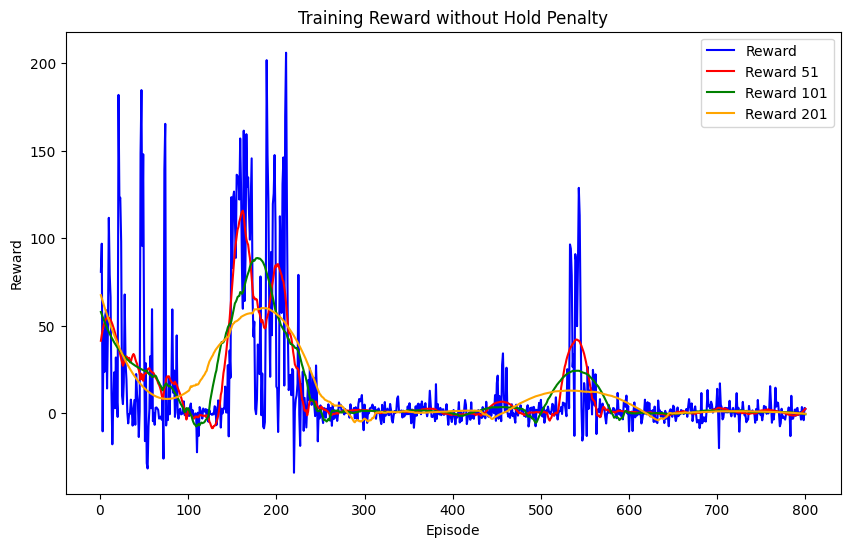

In [18]:
plt.figure(figsize=(10,6))
plt.plot(reward_no_hold_df['Episode'], reward_no_hold_df['Reward'], label='Reward', color='blue')
plt.plot(reward_no_hold_df['Episode'], savgol_filter(reward_no_hold_df['Reward'], 51, 3), label='Reward 51', color='red')
plt.plot(reward_no_hold_df['Episode'], savgol_filter(reward_no_hold_df['Reward'], 101, 3), label='Reward 101', color='green')
plt.plot(reward_no_hold_df['Episode'], savgol_filter(reward_no_hold_df['Reward'], 201, 3), label='Reward 201', color='orange')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Reward without Hold Penalty')
plt.legend()
plt.show()


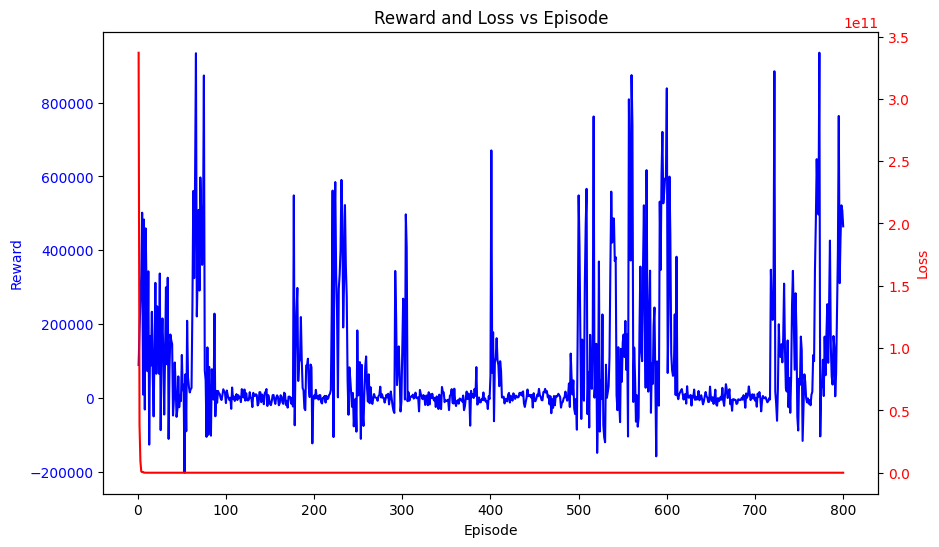

In [19]:
plot_training(log_train)

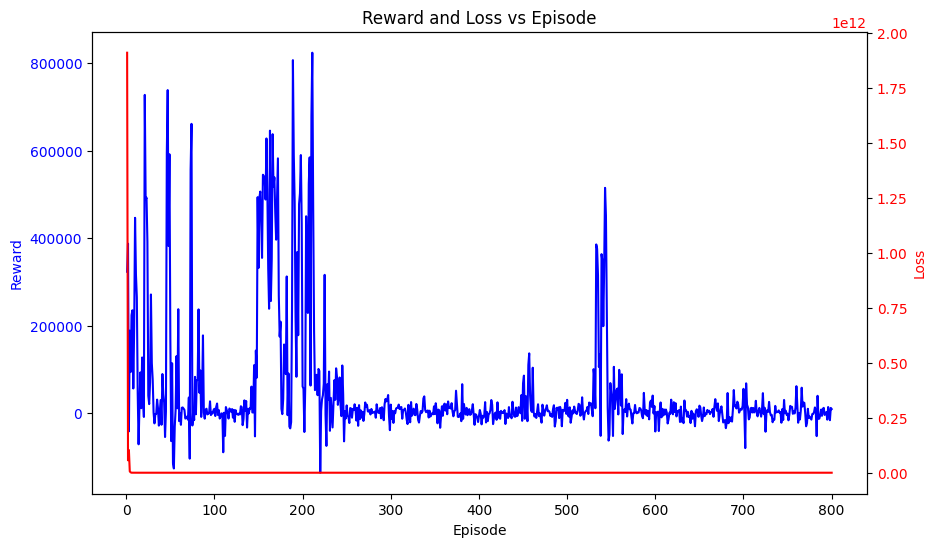

In [20]:
plot_training(log_train_no_hold)

In [21]:
action_episode_df = create_action_episode_df(log_train)
action_episode_df_no_hold = create_action_episode_df(log_train_no_hold)

In [22]:
action_episode_df = action_episode_df.apply(pd.Series.value_counts).transpose().reset_index()
action_episode_df_no_hold = action_episode_df_no_hold.apply(pd.Series.value_counts).transpose().reset_index()

<Axes: >

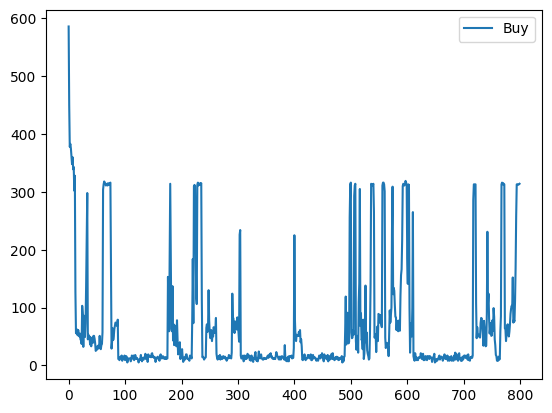

In [23]:
#get value counts of all columns in the DataFrame
action_episode_df[['Buy']].plot()

<Axes: >

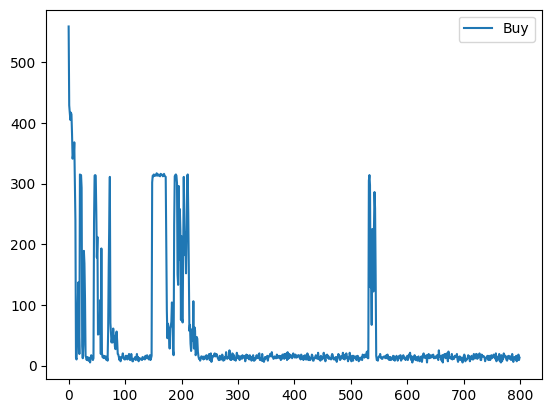

In [24]:
action_episode_df_no_hold[['Buy']].plot()

In [25]:
# Initialize the agent
test_state_size = test_states.shape[2]
action_size = 3
model = ConvDQN(input_dim_conv, output_dim, window_size)
agent = DQNAgent(test_state_size, output_dim, window_size,model, lr=0.0001, gamma=0.95, epsilon=0, epsilon_min=0, epsilon_decay=0.9995)

In [34]:
test_state_size

7

In [51]:
model_path = 'SP500/DQN_CNN_updated_reward_MA_800ep.pth'
agent.model.load_state_dict(torch.load(model_path))

# Ensure the model is in evaluation mode
agent.model.eval()

ConvDQN(
  (conv1): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1664, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [26]:
agent.model.eval()

ConvDQN(
  (conv1): Conv1d(7, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1664, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [27]:
evaluation_log = evaluate_agent(agent, test_states)

In [28]:
evaluation_log['Close'] = evaluation_log['Price']
evaluation_log['Capital'] = capital_calculation(evaluation_log, 'Action')

Total Pofit: 14.454644337951805


In [29]:
evaluation_log

Time Action        Price        Close     Capital
0       1   Hold  2868.439941  2868.439941  100.000000
1       2   Hold  2848.419922  2848.419922  100.000000
2       3   Hold  2881.189941  2881.189941  100.000000
3       4   Hold  2929.800049  2929.800049  100.000000
4       5   Hold  2930.189941  2930.189941  100.000000
..    ...    ...          ...          ...         ...
975   976   Hold  5224.620117  5224.620117  114.454644
976   977   Hold  5241.529785  5241.529785  114.454644
977   978   Hold  5234.180176  5234.180176  114.454644
978   979   Hold  5218.189941  5218.189941  114.454644
979   980   Hold  5203.580078  5203.580078  114.454644

[980 rows x 5 columns]

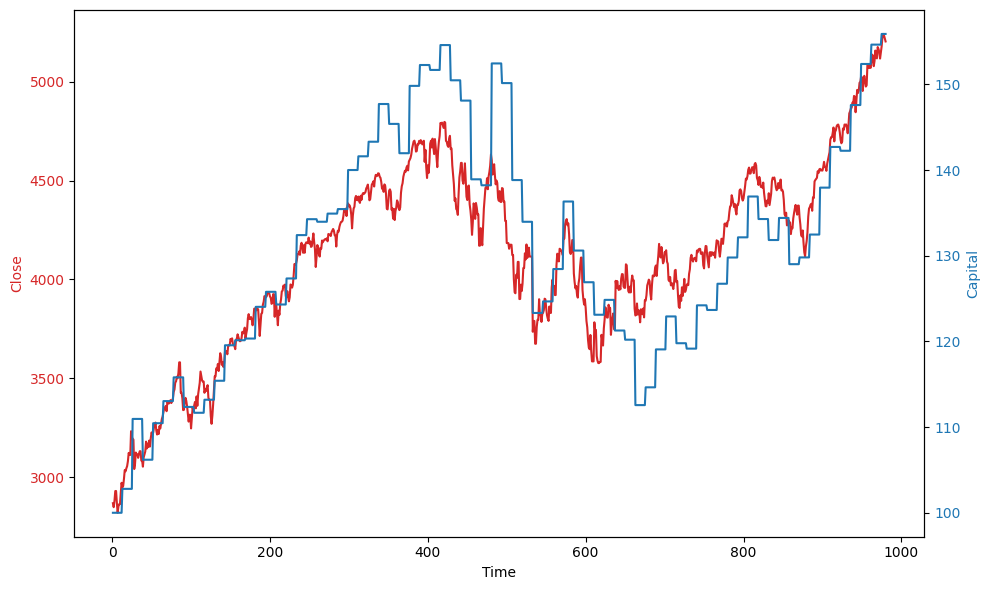

In [66]:
plot_dual_axis(evaluation_log)

In [64]:
print(f"Return without DQN: {(evaluation_log['Close'].iloc[-1] - evaluation_log['Close'].iloc[0])/evaluation_log['Close'].iloc[0] }%")
print(f"Return with DQN: {(evaluation_log['Capital'].iloc[-1] - 100)/100 }%")

Return without DQN: 0.8140801914694961%
Return with DQN: 0.5588603834168748%


In [56]:
all_states = create_states(df_base, window_size)
all_states_eval = evaluate_agent(agent, all_states)

In [57]:
all_states_eval['Close'] = all_states_eval['Price']
all_states_eval['Capital'] = capital_calculation(all_states_eval, 'Action')
all_states_eval

Total Pofit: 257.11094697946385


Time Action        Price        Close     Capital
0        1    Buy  1113.989990  1113.989990  100.000000
1        2   Hold  1098.699951  1098.699951  100.000000
2        3   Hold  1087.119995  1087.119995  100.000000
3        4   Hold  1095.449951  1095.449951  100.000000
4        5   Hold  1097.280029  1097.280029  100.000000
...    ...    ...          ...          ...         ...
5001  5002   Hold  5224.620117  5224.620117  352.947993
5002  5003   Hold  5241.529785  5241.529785  352.947993
5003  5004   Hold  5234.180176  5234.180176  352.947993
5004  5005   Sell  5218.189941  5218.189941  357.110947
5005  5006    Buy  5203.580078  5203.580078  357.110947

[5006 rows x 5 columns]

In [62]:
print(f'Return without trading: {(all_states_eval["Close"].iloc[-1] - all_states_eval["Close"].iloc[0])/all_states_eval["Close"].iloc[0]}')
print(f"Return on Investment: {(all_states_eval['Capital'].iloc[-1] - 100)/100}")

Return without trading: 3.6711192414127587
Return on Investment: 2.5711094697946386


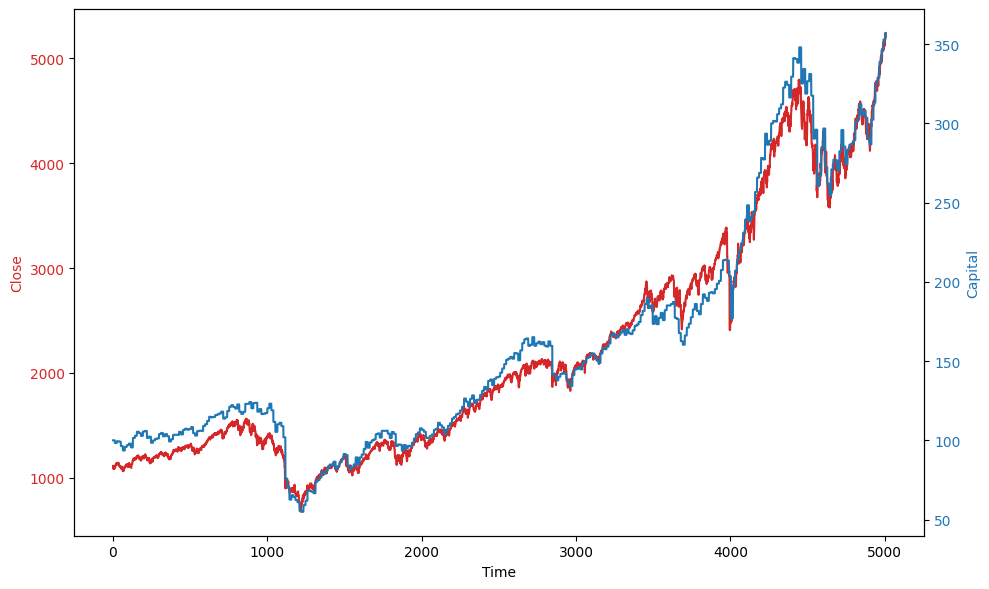

In [67]:
plot_dual_axis(all_states_eval)

##